In [1]:
α = 0.123
β = 0.345
P = [1-α α ; β 1-β]

2×2 Matrix{Float64}:
 0.877  0.123
 0.345  0.655

In [2]:
N=1000
μ = [0.5; 0.5]

2-element Vector{Float64}:
 0.5
 0.5

In [6]:
(μ' * P)'

2-element Vector{Float64}:
 0.611
 0.389

In [9]:
for n in 1:N
    μprime = (μ' * P)'
    η = maximum(abs, μprime-μ)
       if η < 1e-8
            break
       end
    μ = μprime 
end

In [10]:
μ

2-element Vector{Float64}:
 0.7371794694465953
 0.2628205305534047

In [11]:
using LinearAlgebra: I

In [12]:
M = P' - I

2×2 Matrix{Float64}:
 -0.123   0.345
  0.123  -0.345

In [15]:
M = cat( P' - I; dims=1)

2×2 Matrix{Float64}:
 -0.123   0.345
  0.123  -0.345

In [16]:
M[end,:] .= 1.0
M

2×2 Matrix{Float64}:
 -0.123  0.345
  1.0    1.0

In [19]:
D = zeros(2)
D[end] = 1.0
D

2-element Vector{Float64}:
 0.0
 1.0

In [20]:
M\D

2-element Vector{Float64}:
 0.7371794871794872
 0.26282051282051283

In [59]:
ones(size(P,1))/size(P,1)

2-element Vector{Float64}:
 0.5
 0.5

In [71]:
function forecast(P::Matrix; T=100, μ0=ones(size(P,1))/size(P,1))
    sim = [μ0']
    μ = μ0

    for t in 1:T

        μprime = μ' * P
        push!(sim, μprime)
        μ = μprime'
        
    end
    return sim
end

forecast (generic function with 2 methods)

In [72]:
X = forecast(P)

101-element Vector{LinearAlgebra.Adjoint{Float64, Vector{Float64}}}:
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 ⋮
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]

In [123]:
α = 0.1
β = 0.1
P = [1-α α ; β 1-β]
T = 100
μ0 = [0.0; 1.0]

2-element Vector{Float64}:
 0.0
 1.0

In [124]:
function forecast(P::Matrix; T=100, μ0=μ0)
    sim = [μ0']
    μ = μ0

    for t in 1:T

        μprime = μ' * P
        push!(sim, μprime)
        μ = μprime'
        
    end
    return sim
end

forecast (generic function with 2 methods)

In [125]:
using Plots

In [126]:
sim = forecast(P)


101-element Vector{LinearAlgebra.Adjoint{Float64, Vector{Float64}}}:
 [0.0 1.0]
 [0.1 0.9]
 [0.18000000000000002 0.8200000000000001]
 [0.24400000000000005 0.7560000000000001]
 [0.2952000000000001 0.7048000000000001]
 [0.33616000000000007 0.6638400000000001]
 [0.3689280000000001 0.6310720000000001]
 [0.3951424000000001 0.6048576000000001]
 [0.41611392000000014 0.5838860800000002]
 [0.4328911360000002 0.5671088640000002]
 ⋮
 [0.49999999939291656 0.5000000006070845]
 [0.4999999995143334 0.5000000004856677]
 [0.49999999961146685 0.5000000003885343]
 [0.49999999968917364 0.5000000003108276]
 [0.499999999751339 0.5000000002486622]
 [0.49999999980107135 0.5000000001989299]
 [0.4999999998408572 0.500000000159144]
 [0.4999999998726859 0.5000000001273154]
 [0.49999999989814886 0.5000000001018524]

In [127]:
second_col = [row[2] for row in sim]

101-element Vector{Float64}:
 1.0
 0.9
 0.8200000000000001
 0.7560000000000001
 0.7048000000000001
 0.6638400000000001
 0.6310720000000001
 0.6048576000000001
 0.5838860800000002
 0.5671088640000002
 ⋮
 0.5000000006070845
 0.5000000004856677
 0.5000000003885343
 0.5000000003108276
 0.5000000002486622
 0.5000000001989299
 0.500000000159144
 0.5000000001273154
 0.5000000001018524

In [128]:
xvec = 0:T

0:100

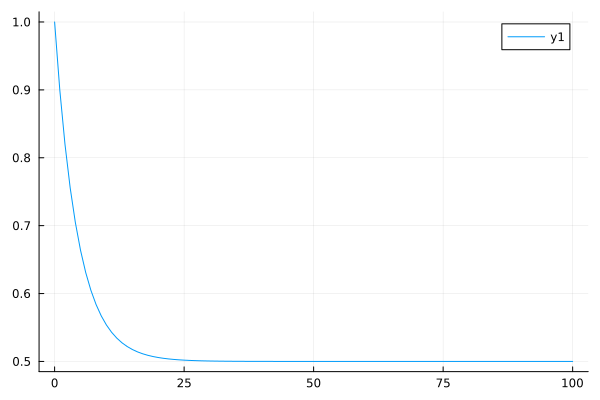

In [129]:
display(plot(xvec, second_col))